<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

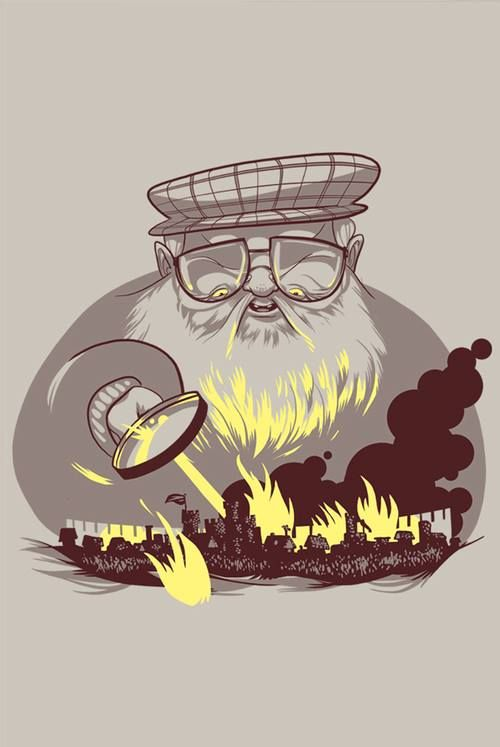

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [394]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 46.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 93.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [396]:
# гиперпараметры

POPULARITY_SCORE = 0.5
NAN_MAX = 0.7
LEN_MAX = 100
TEST_SIZE=0.2,
RANDOM_STATE=42,

In [397]:
data = pd.read_csv("game_of_thrones_train.csv", index_col=0)
test_data = pd.read_csv("game_of_thrones_test.csv", index_col=0)

In [398]:
useless_col = []

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [399]:
for col in data.columns:
  arr_unique = data[col].unique()
  arr = data[col]
  nan_relation = pd.isna(arr).sum() / len(arr)
  numerical = pd.api.types.is_numeric_dtype(data[col])
  print(f"{col}:\n  NaN: {int(nan_relation * 100)}%\n  len: {len(arr_unique)}\n  numerical: {numerical}")
  if (nan_relation > NAN_MAX or (not numerical and len(arr_unique) > LEN_MAX)):
    useless_col.append(col)
  elif (nan_relation):
    if (numerical):
      data.fillna({col: data[col].mean(skipna=True)}, inplace=True)
      test_data.fillna({col: data[col].mean(skipna=True)}, inplace=True)
    else:
      data.fillna({col: data[col].mode()[0]}, inplace=True)
      test_data.fillna({col: data[col].mode()[0]}, inplace=True)

name:
  NaN: 0%
  len: 1557
  numerical: False
title:
  NaN: 53%
  len: 196
  numerical: False
male:
  NaN: 0%
  len: 2
  numerical: True
culture:
  NaN: 68%
  len: 52
  numerical: False
dateOfBirth:
  NaN: 82%
  len: 106
  numerical: True
mother:
  NaN: 98%
  len: 17
  numerical: False
father:
  NaN: 98%
  len: 20
  numerical: False
heir:
  NaN: 98%
  len: 21
  numerical: False
house:
  NaN: 24%
  len: 316
  numerical: False
spouse:
  NaN: 87%
  len: 187
  numerical: False
book1:
  NaN: 0%
  len: 2
  numerical: True
book2:
  NaN: 0%
  len: 2
  numerical: True
book3:
  NaN: 0%
  len: 2
  numerical: True
book4:
  NaN: 0%
  len: 2
  numerical: True
book5:
  NaN: 0%
  len: 2
  numerical: True
isAliveMother:
  NaN: 98%
  len: 3
  numerical: True
isAliveFather:
  NaN: 98%
  len: 3
  numerical: True
isAliveHeir:
  NaN: 98%
  len: 3
  numerical: True
isAliveSpouse:
  NaN: 87%
  len: 3
  numerical: True
isMarried:
  NaN: 0%
  len: 2
  numerical: True
isNoble:
  NaN: 0%
  len: 2
  numerical: Tr

In [400]:
useless_col

['name',
 'title',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'age']

In [401]:
data.drop(useless_col, inplace=True, axis=1)
test_data.drop(useless_col, inplace=True, axis=1)

In [402]:
data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,
1,1,Northmen,0,0,0,0,0,0,0,11,0.605351,0
2,1,Rivermen,1,1,1,1,1,1,1,1,0.896321,1
3,1,Northmen,0,0,0,1,0,0,1,0,0.267559,1
4,0,Northmen,0,0,0,0,0,1,1,0,0.183946,0
5,0,Dornish,0,0,0,1,0,1,1,0,0.043478,1


In [403]:
test_data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity
S.No,,,,,,,,,,,
1558,0,Northmen,0,0,0,0,1,0,0,0,0.050167
1559,0,Asshai,0,1,1,1,1,0,0,0,0.745819
1560,0,Northmen,0,0,1,1,0,0,0,0,0.010033
1561,1,Northmen,1,1,1,1,1,0,1,0,0.220736
1562,1,Riverlands,1,1,1,1,1,1,0,0,0.434783


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [404]:
data['isPopular'] = (data['popularity'] >= POPULARITY_SCORE).astype(int)
test_data['isPopular'] = (test_data['popularity'] >= POPULARITY_SCORE).astype(int)

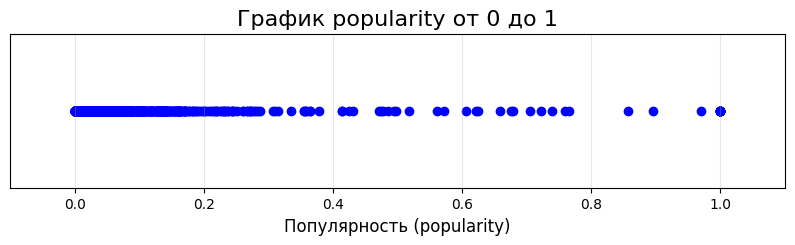

In [405]:
plt.figure(figsize=(10, 2))
plt.scatter(data['popularity'], np.zeros_like(data['popularity']), color='blue')
plt.xlim(-0.1, 1.1)
plt.yticks([])  # Убираем метки оси Y
plt.title("График popularity от 0 до 1", fontsize=16)
plt.xlabel("Популярность (popularity)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [406]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
test_data['boolDeadRelations'] = (test_data['numDeadRelations'] > 0).astype(int)

In [407]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [408]:
def simplify_culture(culture):
    for key, values in cult.items():
        if isinstance(culture, str):
            if any(val in culture.lower() for val in values):
                return key
    return culture

data['culture'] = data['culture'].apply(simplify_culture)
test_data['culture'] = test_data['culture'].apply(simplify_culture)

In [409]:
data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,1,Northmen,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,1,Rivermen,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,1,Northmen,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,0,Northmen,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,0,Dornish,0,0,0,1,0,1,1,0,0.043478,1,0,0


In [410]:
test_data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1558,0,Northmen,0,0,0,0,1,0,0,0,0.050167,0,0
1559,0,Asshai,0,1,1,1,1,0,0,0,0.745819,1,0
1560,0,Northmen,0,0,1,1,0,0,0,0,0.010033,0,0
1561,1,Northmen,1,1,1,1,1,0,1,0,0.220736,0,0
1562,1,Riverlands,1,1,1,1,1,1,0,0,0.434783,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

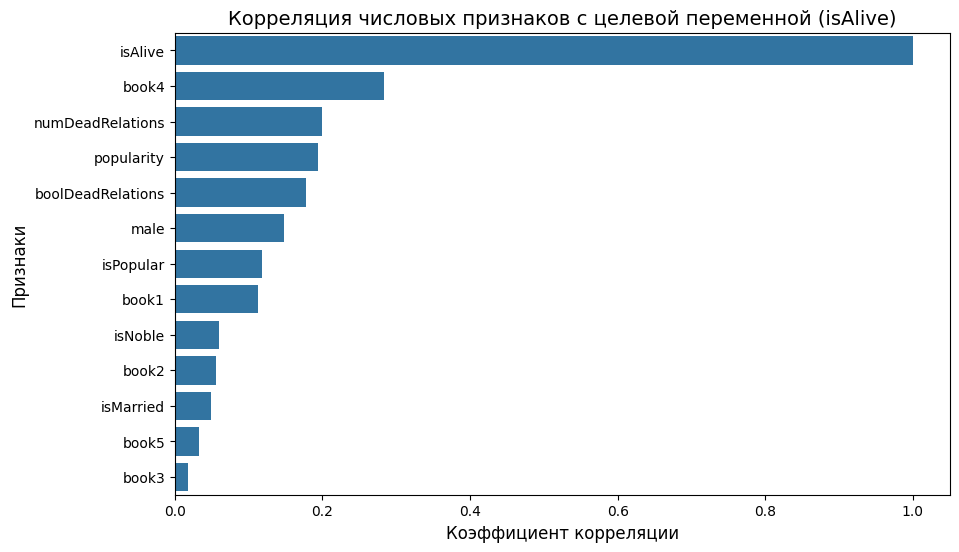

In [411]:
target_column = 'isAlive'

numeric_columns = data.select_dtypes(include=['number'])

correlation_with_target = numeric_columns.corrwith(numeric_columns[target_column]).abs()

correlation_with_target = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title(f"Корреляция числовых признаков с целевой переменной ({target_column})", fontsize=14)
plt.xlabel("Коэффициент корреляции", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.show()

In [412]:
# data.drop(columns=[...], inplace = True) - большая часть удаления и чистки произошла в пункте 1.2

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.


Доли классов:
isAlive
1    77.842004
0    22.157996
Name: count, dtype: float64


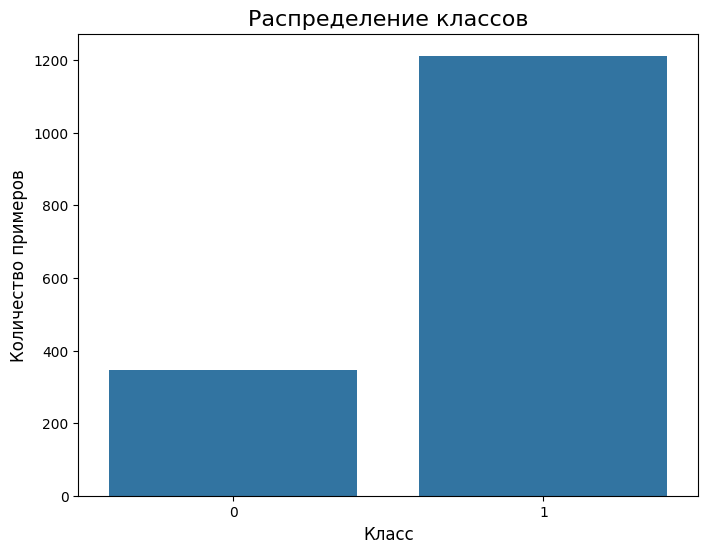

In [413]:
# isAlive - категориальный признак, равен либо 0, либо 1
class_proportions = class_distribution / len(data) * 100
print("\nДоли классов:")
print(class_proportions)

plt.figure(figsize=(8, 6))
sns.countplot(x='isAlive', data=data, legend=False)
plt.title('Распределение классов', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество примеров', fontsize=12)
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [414]:
data_onehot = pd.get_dummies(data, columns=['culture'], drop_first=False).astype(int)
test_data_onehot = pd.get_dummies(test_data, columns=['culture'], drop_first=False).astype(int)

In [415]:
# найдём различия

train_unique = list(set(data_onehot.columns) - set(test_data_onehot.columns))
train_unique.remove('isAlive')
test_unique = list(set(test_data_onehot.columns) - set(data_onehot.columns))

data_onehot.drop(train_unique, inplace=True, axis=1)
test_data_onehot.drop(test_unique, inplace=True, axis=1)

#for col in test_unique:
#  data_onehot[col] = 0

#for col in train_unique:
#  test_data_onehot[col] = 0

In [416]:
data_onehot.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,culture_Reach,culture_Rivermen,culture_Stormlander,culture_Summer Islands,culture_Tyroshi,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westermen,culture_Westerosi
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
test_data_onehot.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,culture_Reach,culture_Rivermen,culture_Stormlander,culture_Summer Islands,culture_Tyroshi,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westermen,culture_Westerosi
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1559,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1562,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
print(list(set(data_onehot.columns) - set(test_data_onehot.columns)))

['isAlive']


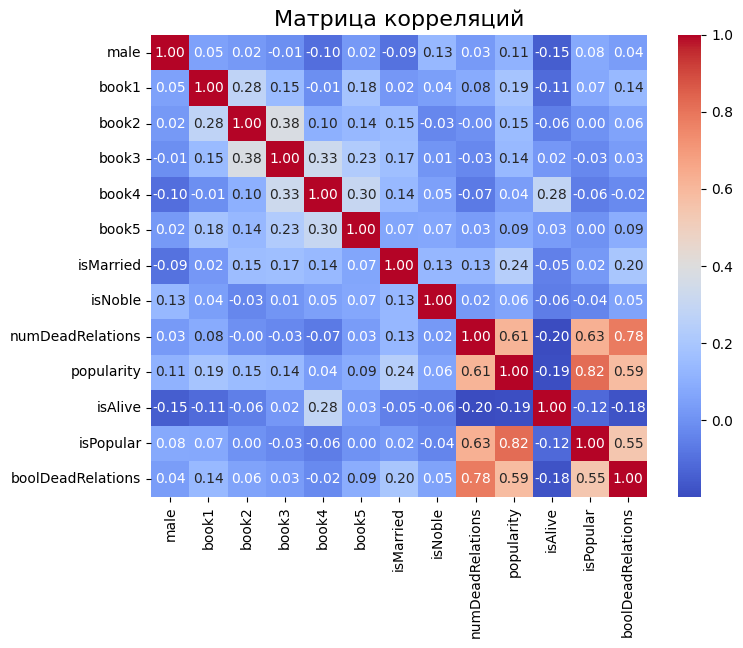

In [419]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)

plt.title("Матрица корреляций", fontsize=16)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

<ipython-input-420-134fd2f2029b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


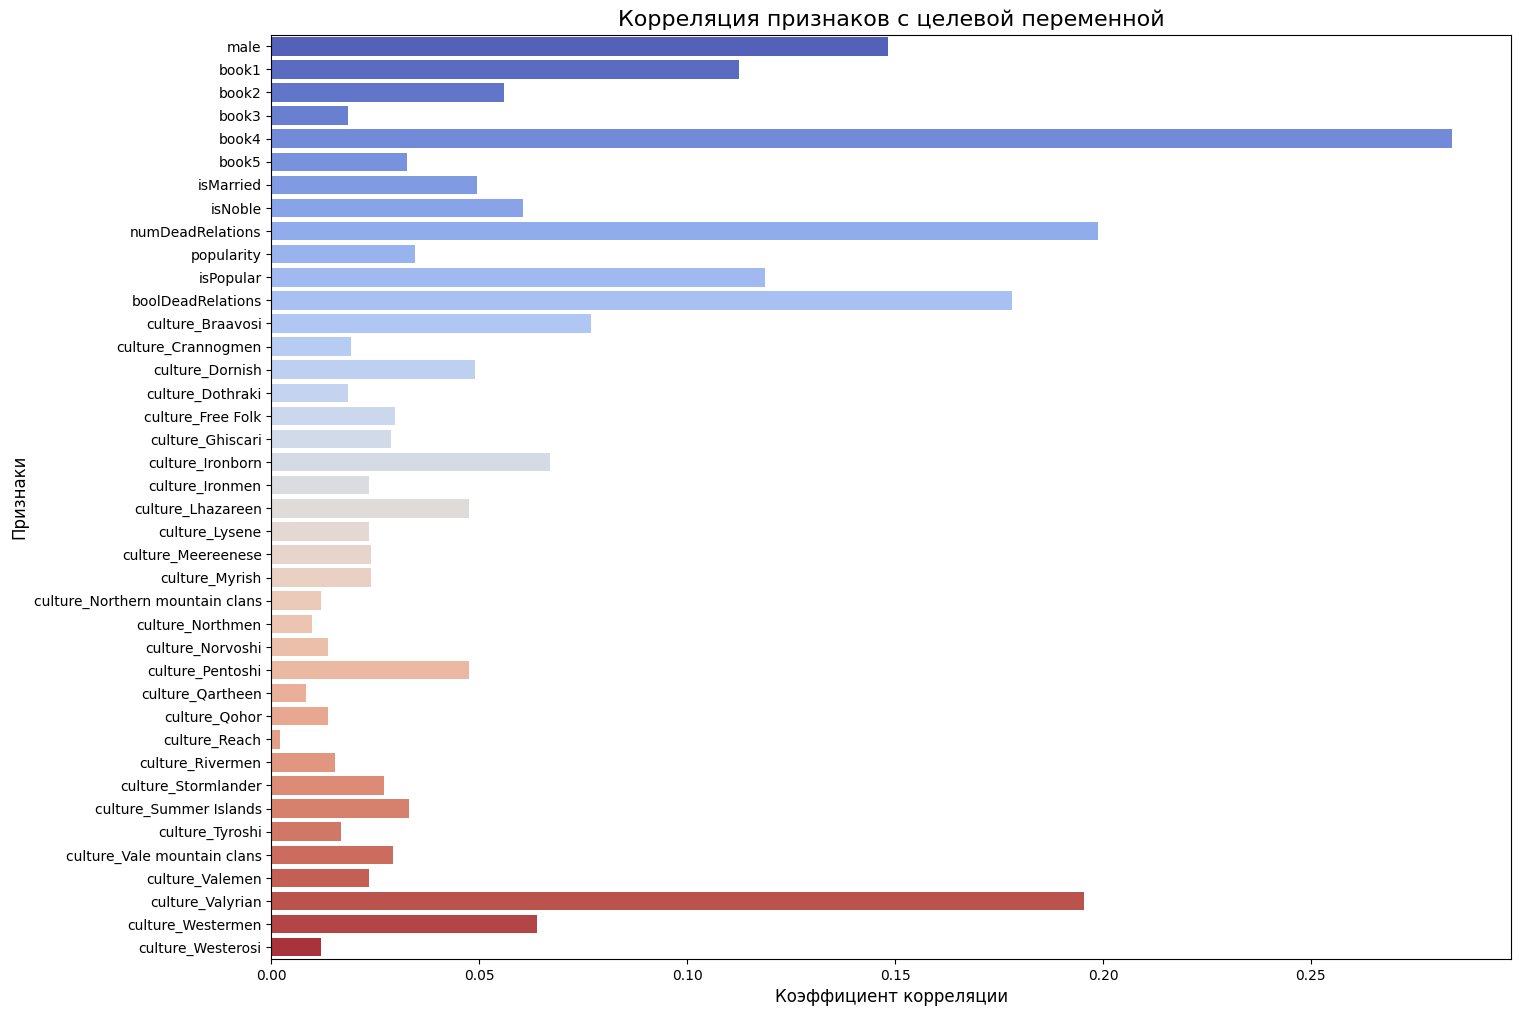

In [420]:
correlations = data_onehot.corrwith(data['isAlive']).abs()
correlations = correlations.drop('isAlive')

plt.figure(figsize=(16, 12))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Корреляция признаков с целевой переменной", fontsize=16)
plt.xlabel("Коэффициент корреляции", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [421]:
X = data_onehot.drop('isAlive', axis=1)
y = data_onehot['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [422]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)